In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [228]:
def plot_loss_and_acc(loss, acc, title,runtype, log = False, ax1 = None, text = ""):

  if ax1 is None:
    fig, ax1 = plt.subplots()

  # print(loss.shape,acc.shape)

  b, g = "royalblue", "seagreen"
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss', color = b)
  # ax1.plot(loss, label = "Loss", color = b)
  ax1.fill_between([i for i in range(len(loss[0]))], np.min(loss,axis = 0), np.max(loss,axis = 0), color = b, alpha = 0.6)
  ax1.tick_params(axis='y')
  ax1.set_ylim(0,np.max(loss))
  ax1.plot(np.mean(loss,axis = 0), '--', color = b)
  if log:
    ax1.set_xscale("log")

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x--axis

  ax2.set_ylabel('Validation accuracy', color = g)
  # ax2.plot(acc, label = "Accuracy", color = g)
  ax2.fill_between([i for i in range(len(acc[0]))], np.min(acc,axis = 0), np.max(acc,axis = 0), color = g, alpha = 0.6)
  ax2.set_ylim(0.5,1)
  ax2.plot(np.mean(acc,axis = 0), '--', color = g)
  ax2.tick_params(axis='y')

  ax1.set_title(title)
  ax1.text(np.log(len(loss[0]))/6,0.05, text)

  # fig.tight_layout()  # otherwise the right y-label is slightly clipped
  # fig.legend(loc = 0)
  
#   plt.savefig(pth+runtype+str(len(acc[0]))+"epochs.png")
  # plt.show()


In [240]:
def plot_mult(loss, acc, title,runtype, log = False, ax1 = None, text = ""):

  if ax1 is None:
    fig, ax1 = plt.subplots()

  # print(loss.shape,acc.shape)

  b, g = "royalblue", "seagreen"
#   ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss', color = b)
#   # ax1.plot(loss, label = "Loss", color = b)
  ax1.fill_between([i for i in range(len(loss[0]))], np.min(loss,axis = 0), np.max(loss,axis = 0), color = b, alpha = 0.6)
#   ax1.tick_params(axis='y')
  ax1.set_ylim(0,np.max(loss))
  ax1.plot(np.mean(loss,axis = 0), '--', color = b)
  if log:
    ax1.set_xscale("log")

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x--axis

  ax2.set_ylabel('Validation accuracy', color = g)
  # ax2.plot(acc, label = "Accuracy", color = g)
  ax2.fill_between([i for i in range(len(acc[0]))], np.min(acc,axis = 0), np.max(acc,axis = 0), color = g, alpha = 0.6)
  ax2.plot(np.mean(acc,axis = 0), '--', color = g)
#   ax2.tick_params(axis='y')

  ax1.set_title(title)

  # ax2.set_ylim(0.5,1)
  # ax1.get_shared_y_axes().join(ax1,ax2)

  ax1.text(np.log(len(loss[0]))/6,0.05, text)

  return ax2
  # fig.tight_layout()  # otherwise the right y-label is slightly clipped
  # fig.legend(loc = 0)
  
#   plt.savefig(pth+runtype+str(len(acc[0]))+"epochs.png")
  # plt.show()

(1, 600)

600


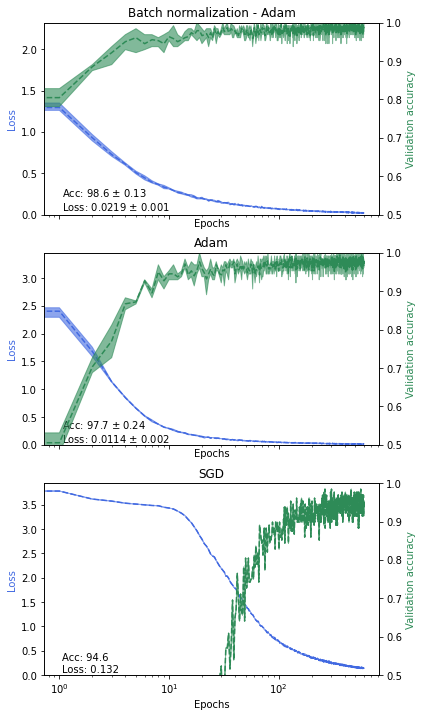

In [237]:
fig, axs = plt.subplots(3,1,figsize = (6,12),sharex = True)

loss = np.genfromtxt("Runs/all lossesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")
test =  np.genfromtxt("Runs/all final_accuraciesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")


t =  f"Acc: {np.mean(test):.3} $\pm$ {np.std(test):.2}\nLoss: {np.mean(loss[:,-1]):.3} $\pm$ {np.std(loss[:,-1]):.1}"
plot_loss_and_acc(loss,acc,"Batch normalization - Adam" ,"",True,ax1=axs[0], text = t)


loss = np.genfromtxt("Runs/all lossesNormal - ADAM200epochs-0.01LR.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesNormal - ADAM200epochs01LR.csv",delimiter = ",").reshape((3,600))
test = np.genfromtxt("Runs/all final_accuraciesNormal - ADAM200epochs-0.01LR.csv",delimiter = ",")

t =  f"Acc: {np.mean(test):.3} $\pm$ {np.std(test):.2}\nLoss: {np.mean(loss[:,-1]):.3} $\pm$ {np.std(loss[:,-1]):.1}"
plot_loss_and_acc(loss,acc,"Adam","",True,ax1=axs[1], text = t)


loss = np.genfromtxt("Runs/all lossesNormal - SGD200epochs.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesNormal - SGD200epochs.csv",delimiter = ",")
test = np.genfromtxt("Runs/all final_accuraciesNormal - SGD200epochs.csv",delimiter = ",")

print(len(loss))
acc = np.expand_dims(acc,0)
loss = np.expand_dims(loss,0)
# acc.shape

t =  f"Acc: {np.mean(test):.3}\nLoss: {np.mean(loss[:,-1]):.3}"
plot_loss_and_acc(loss,acc,"SGD","",True,ax1=axs[2], text = t)


normal 200 Acc: 0.976 $\pm$ 0.013
Loss: 0.0603 $\pm$ 0.03
normal 400 Acc: 0.977 $\pm$ 0.013
Loss: 0.0244 $\pm$ 0.007
normal 1000 Acc: 0.979 $\pm$ 0.011
Loss: 0.00395 $\pm$ 0.0002
nearest 200 Acc: 0.976 $\pm$ 0.013
Loss: 0.067 $\pm$ 0.02
nearest 400 Acc: 0.977 $\pm$ 0.013
Loss: 0.0233 $\pm$ 0.007
nearest 1000 Acc: 0.978 $\pm$ 0.012
Loss: 0.0033 $\pm$ 0.0002
elu 200 Acc: 0.977 $\pm$ 0.013
Loss: 0.056 $\pm$ 0.02
elu 400 Acc: 0.977 $\pm$ 0.012
Loss: 0.0196 $\pm$ 0.005
elu 1000 Acc: 0.977 $\pm$ 0.013
Loss: 0.00307 $\pm$ 0.0002
nearest_elu 200 Acc: 0.977 $\pm$ 0.013
Loss: 0.0385 $\pm$ 0.003
nearest_elu 400 Acc: 0.977 $\pm$ 0.012
Loss: 0.0307 $\pm$ 0.01
nearest_elu 1000 Acc: 0.978 $\pm$ 0.013
Loss: 0.00367 $\pm$ 0.0003


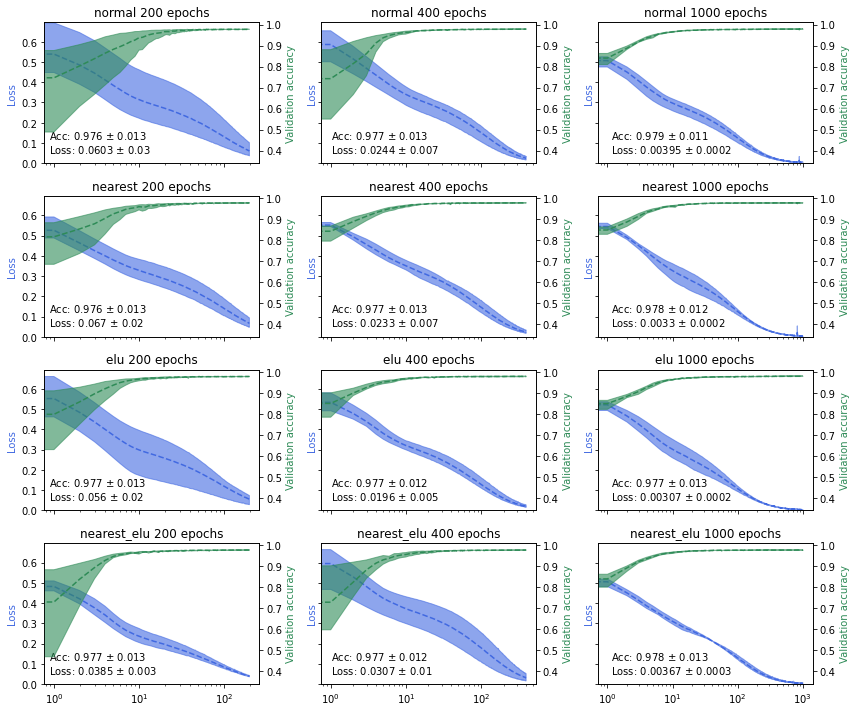

In [241]:


fig, axs = plt.subplots(4,3, figsize = (12,10), sharey=True, sharex= "col")

axs = axs.flatten()

i_plot = 0


lasty = None
for type in xray.keys():
    for n_epochs in ["200", "400", "1000"]:
        xray = np.load("Runs/xray_runs"+n_epochs+"epochs.npy",allow_pickle = True).item()

        loss = []
        acc = []
        for i in range(3):
            r = np.array(xray[type]["train_history"][i]["loss"])
            a = np.array(xray[type]['val_history'][i]['f1'])

            loss.append(r)
            acc.append(a)
        loss = np.array(loss)
        acc = np.array(acc)


        test = xray[type]["test_scores"]
        t = f"Acc: {np.mean(test):.3} $\pm$ {np.std(test):.2}\nLoss: {np.mean(loss[:,-1]):.3} $\pm$ {np.std(loss[:,-1]):.1}"
        ax2 = plot_mult(loss,acc,type + " " + n_epochs + " epochs" ,"",True, ax1 = axs[i_plot], text = t) #+ f" - {n_epochs} epochs - avg test scores {np.mean(test):.3} $\pm$ {np.std(test):.3}"
        
        if not lasty is None:
            ax2.get_shared_y_axes().join(ax2,lasty)

        lasty = ax2
        i_plot += 1

        print(type,n_epochs,t)

        

fig.tight_layout()